# Data Scientist Professional Case Study

### Company Background

National Accessibility currently installs wheelchair ramps for office buildings and schools. The marketing manager wants the company to start installing ramps for event venues as well. According to a new survey, approximately 40% of event venues are not wheelchair accessible. However, it is not easy to know whether a venue already has a ramp installed.

It is a waste of time to contact venues that already have a ramp installed, and it also looks bad for the company. They would like the help of the data science team in predicting which venues already have a ramp installed. 

### Customer Question

The marketing manager would like to know:
- Can you develop a model to predict whether an event venue already has a wheelchair ramp installed?

### Success Criteria

To reduce the amount of time wasted by the company contacting venues that already have a ramp, at least two-thirds of venues predicted to be without a ramp should not have a ramp. 


### Dataset


The data you will use for this analysis can be accessed here: `"data/event_venues.csv"`

# Index
1. Data Overview
2. Exploratory Data Analysis
3. Preprocessing
4. Model Developement
5. Outcomes

# Data Overview
___
We first need to undestand the problem that we want to solve. 
We were given a target value: **"Wheelchair accessible"**, from that we can conclude that our machine learning model needs to be of type **supervised**. 
Also since we desire to predict a category the model needs to be a classifier. This is a **categorization** problem.

In [4]:
# Libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.model_selection import train_test_split

In [5]:
# Data Overview

df = pd.read_csv("data/event_venues.csv")
df.head()

,venue_name,Loud music / events,Venue provides alcohol,Wi-Fi,supervenue,U-Shaped_max,max_standing,Theatre_max,Promoted / ticketed events,Wheelchair accessible
0,techspace aldgate east,False,0,True,False,35.045455,0,112.715867,False,False
1,green rooms hotel,True,1,True,False,40.000000,120,80.000000,True,False
2,148 leadenhall street,False,0,True,False,35.045455,0,112.715867,False,False
3,conway hall,False,0,True,False,35.045455,60,60.000000,False,False
4,gridiron building,False,0,True,False,35.045455,0,112.715867,False,False


In [6]:
# Variables for exploration

target = 'Wheelchair accessible'

bool_col_list = ["Loud music / events",'Wi-Fi',"supervenue","Promoted / ticketed events", "Wheelchair accessible"]

data = df.drop(['venue_name'], axis = 1)

Now we need to change all the boolean features to numeric ones so that we can make plots and use them in our models

In [7]:
# Data boolean mapping

def boolean_mapper (df, col_list):
    for i in col_list:
    	df[i] = df[i].map({True: 1,False: 0})
    return df

boolean_mapper(data,bool_col_list)

,Loud music / events,Venue provides alcohol,Wi-Fi,supervenue,U-Shaped_max,max_standing,Theatre_max,Promoted / ticketed events,Wheelchair accessible
0,0,0,1,0,35.045455,0,112.715867,0,0
1,1,1,1,0,40.000000,120,80.000000,1,0
2,0,0,1,0,35.045455,0,112.715867,0,0
3,0,0,1,0,35.045455,60,60.000000,0,0
4,0,0,1,0,35.045455,0,112.715867,0,0
...,...,...,...,...,...,...,...,...,...
3905,1,1,1,0,40.000000,450,450.000000,0,1
3906,0,0,1,0,28.000000,0,28.000000,0,1
3907,0,1,1,0,13.000000,20,20.000000,0,1
3908,0,1,1,0,8.000000,20,20.000000,0,1


Now, let's split our data, we will leave the testing for the end, once we've determined the best model.
We also need to remember to stratify our split since it appears from the call df.head() that our target values are ordered. We need to mantain the proportion of our target values in the train data and also in the test data.

In [8]:
# Split X, y
X = data.drop([target], axis = 1)
y = data[target]

# Split train test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)


# Prints
print('Dataset lenght:', len(data))
print('X_train lenght:', len(X_train))
print('X_test lenght:', len(X_test))
print('y_train lenght:', len(y_train))
print('y_test lenght:', len(y_test))

Dataset lenght: 3910
X_train lenght: 3128
X_test lenght: 782
y_train lenght: 3128
y_test lenght: 782


In [9]:
# Prove that the original dataset is ordered. The first half has only target value of 0
data.iloc[:1955,-1].value_counts()

0    1955
Name: Wheelchair accessible, dtype: int64

# Exploratory Data Analysis
___

In [10]:
data.describe()

,Loud music / events,Venue provides alcohol,Wi-Fi,supervenue,U-Shaped_max,max_standing,Theatre_max,Promoted / ticketed events,Wheelchair accessible
count,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000
mean,0.358824,0.713299,0.929412,0.062404,35.045455,114.203581,112.715867,0.379028,0.500000
std,0.479717,0.452278,0.256169,0.241919,43.937591,272.269943,131.853249,0.485207,0.500064
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,35.045455,0.000000,80.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,0.000000,35.045455,50.000000,112.715867,0.000000,0.500000
75%,1.000000,1.000000,1.000000,0.000000,35.045455,120.000000,112.715867,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,2520.000000,7500.000000,4000.000000,1.000000,1.000000


Looking at the summary statistics we can see that the **maximum** and **minimum** value of the **numerical features** are far out from the mean which could suggest outliers. For now we will not consider them as oultiers, as it make sense that there are some venues that have a total capacity far larger from the rest.

In [11]:
# Explore distribution of target values

data[target].value_counts()

0    1955
1    1955
Name: Wheelchair accessible, dtype: int64

Our target values are even distribuited between the two possible options. Each one consisting of **1955** elements

#### Categorical features exploration

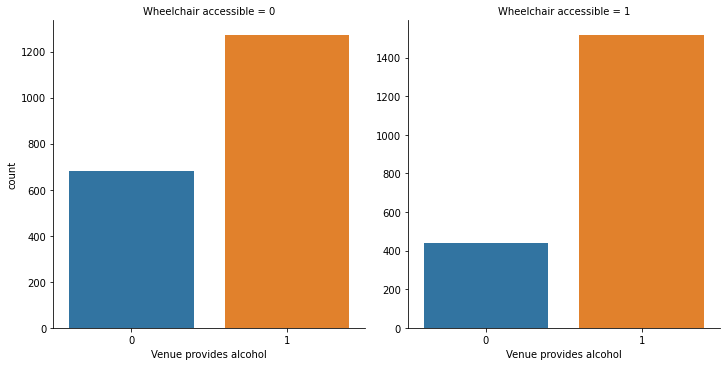

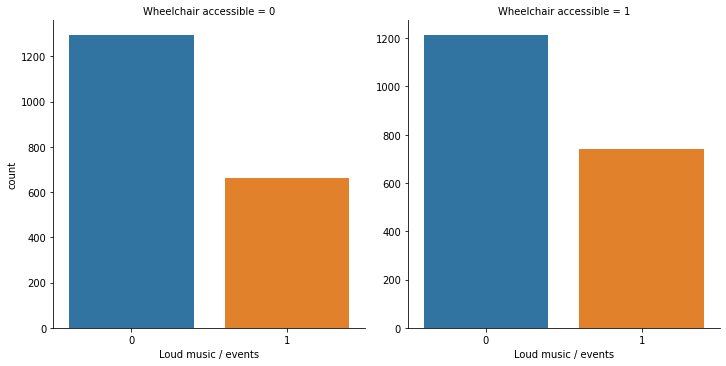

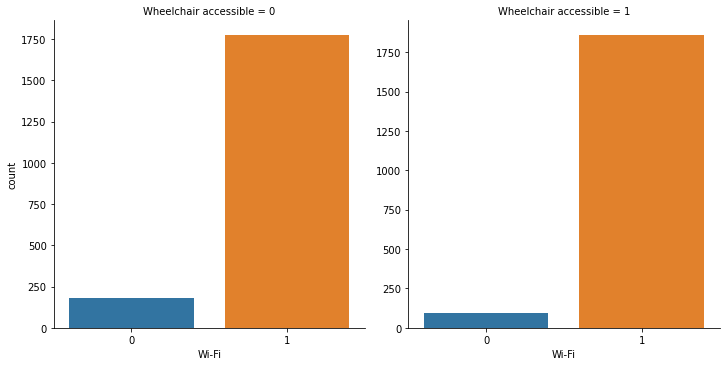

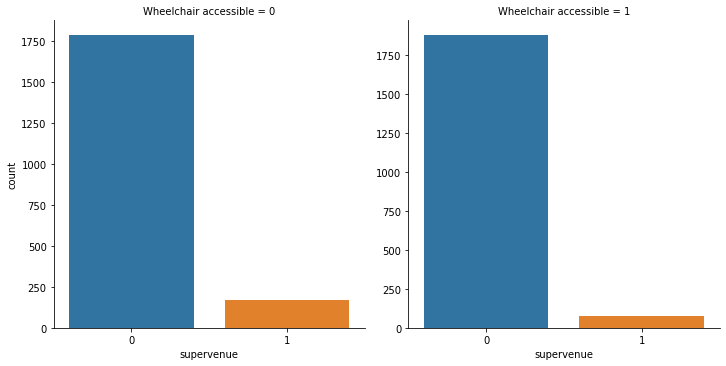

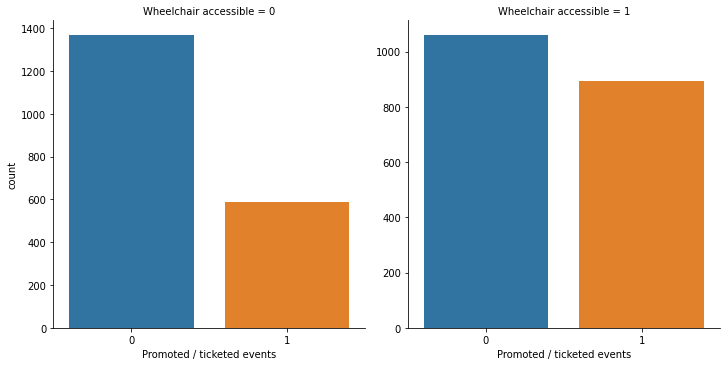

In [12]:
# Explore distribution of target values over categorical features

categorical_features = ['Venue provides alcohol', 'Loud music / events', 'Wi-Fi', 'supervenue', 'Promoted / ticketed events']

for col in categorical_features:
        ax = sns.catplot(x = col, kind='count', col = target, data=data, sharey=False)

We can see that vanues that **promoted/ticketed events** tend to be more likely to be wheelchair accessible, and those whose do not **sell alcohol** are less likely to be **wheelchair accessibile**.

#### Numerical features exploration

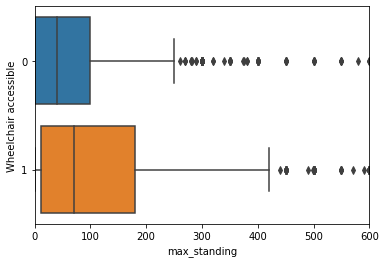

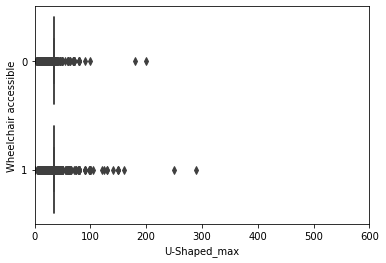

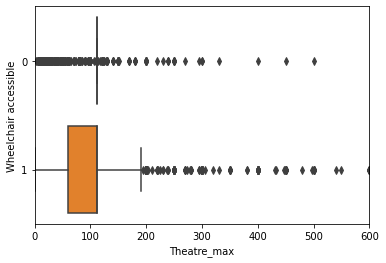

In [13]:
data[target] = data[target].astype('category')

num_features = [ 'max_standing', 'U-Shaped_max', 'Theatre_max',]

for col in num_features:
    ax = sns.boxplot(y = target, x = col, data=data)
    ax.set_xlim(0,600)
    plt.show()

We can see that we have a lot of **outliers** in our numerical features. The distribution of **Theatre_max** and **U-shaped_max** is dispersed. But we can see that those venues whose have a larger **max_standing capacity** tends to be wheelchair accessible. And that makes sense, since a larger venue tends to have access to more funds, so it's very likely that those venue have already a wheelchair ramp. This might be an importat feature in predicting venue that are wheelchair accessible.

#### Correlations
---

Descovering the correlation between the features and the target variable it's an important part of EDA. Using the correlation value we can understand which features are good predictors of our target variable.

In [14]:
# Correlation matrix
data[target] = data[target].astype('int')
corr_matrix = data.corr()

# print
print("Correlation with \n")
print(corr_matrix[target].sort_values(ascending=False))

Correlation with 

Wheelchair accessible         1.000000
Promoted / ticketed events    0.162369
Venue provides alcohol        0.138560
max_standing                  0.137144
Theatre_max                   0.091873
Wi-Fi                         0.083875
Loud music / events           0.043190
U-Shaped_max                  0.024257
supervenue                   -0.101503
Name: Wheelchair accessible, dtype: float64


To conferm what we saw above, this correlation values suggest us that the best predictors are **Promoted / ticketed events (0.16)**, **Venue provides alcohol (0.13), max_standing  (0.137)**, and having a negative correlation, **supervenue (-0.1)**. But, as we can see no feature has a strong, positive or negative, correlation with or target variable.

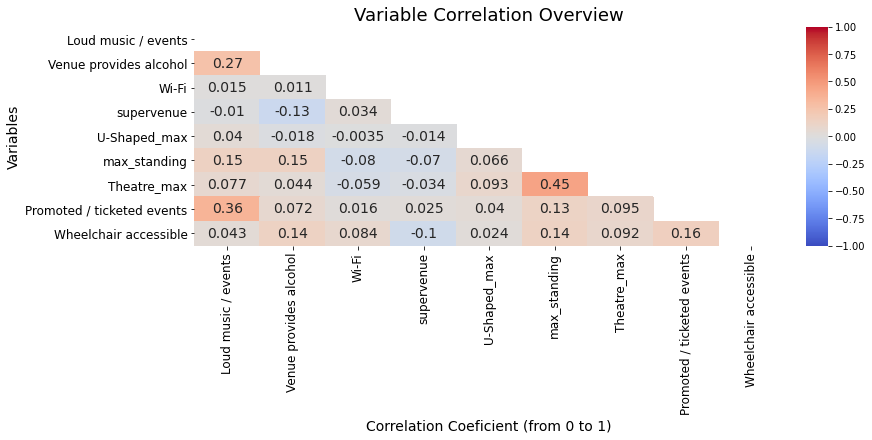

In [15]:
# Heatmap
figg = plt.figure(figsize = (12,6), constrained_layout = True)
ax = figg.subplots()

# Plot Corpus
upp_mat = np.triu(df.corr())

sns.heatmap(data.corr(), vmin = -1, vmax = +1, annot = True,
            cmap = "coolwarm",annot_kws = {'size':14}, mask = upp_mat)

# Appareance
plt.title("Variable Correlation Overview", fontsize = 18)
plt.ylabel("Variables", fontsize = 14)
plt.yticks(fontsize = 12)
plt.xlabel("Correlation Coeficient (from 0 to 1)", fontsize = 14)
plt.xticks(rotation = 90, fontsize = 12)

# Show
plt.show()

#### P Significance

In [16]:
# p-value 

p_list = []

for col in data.columns[:-1]:
    _, p = stats.pearsonr(data[target], data[col])
    p_list.append(p)
    print(col, 'p value: ', p)

Loud music / events p value:  0.006912278634353239
Venue provides alcohol p value:  3.2202991977858834e-18
Wi-Fi p value:  1.5022795683491803e-07
supervenue p value:  1.9991616526903284e-10
U-Shaped_max p value:  0.1293853790383352
max_standing p value:  7.078254512588652e-18
Theatre_max p value:  8.655567380058508e-09
Promoted / ticketed events p value:  1.6549428075424375e-24


According to p-value, with significance level of **0.05**, all variables except **U-shaped_max** are significatly correlated to the target variable.

# Preprocessing
___

We need to prepare our dataset for modeling 

In [17]:
# Drop the uncorrelated variable
X_train = X_train.drop(['U-Shaped_max'], axis=1)
X_test = X_test.drop(['U-Shaped_max'], axis=1)

#### Scaling

We will use both the standardized data and the min-max normalized data, since both can be applied to our problem. We will than compare the results to find out which data scaling performs best.

In [18]:
# Standard Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler_standard = StandardScaler()
X_train_stand = scaler_standard.fit_transform(X_train)
X_test_stand = scaler_standard.transform(X_test)

scaler_min_max = MinMaxScaler()
X_train_norm = scaler_min_max.fit_transform(X_train)
X_test_norm = scaler_min_max.transform(X_test)

#### Inverting
Since we are required to maximize predicting a venue as not accessible to wheelchair and reducing the cases in which it's predicted to not have a wheelchair ramp but the venue has indeed a wheelchair ramp, we need to invert our positive class. We do this, because Sk-learn can only calculate precision on the positive class.

In [19]:
# Inversion
y_train = y_train.replace({0 : 1, 1 : 0})
y_test = y_test.replace({0 : 1, 1 : 0})

# Model Training
---
first we will try to find out the best kind of model. Then we will try to tune the hyperparameters of such model.

In [20]:
# Modeling libraries

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import GridSearchCV, cross_val_score, KFold 
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, precision_score

# KFold for Cross Validation
kf = KFold(n_splits = 10) 

# Scoring Metric
scoring = 'precision'

LR: 0.607931 (0.045063)
LDA: 0.612687 (0.055396)
KNN: 0.621021 (0.043281)
DTC: 0.609875 (0.044780)
NB: 0.556950 (0.046316)
SVC: 0.616220 (0.053654)


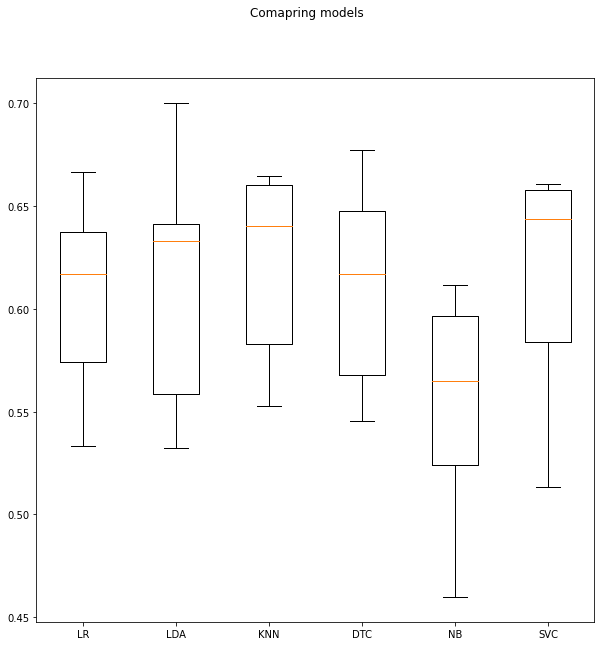

In [21]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC()))

results=[]
names= []
for name, model in models:
    cv_results = cross_val_score(model,X_train,y_train, cv=kf,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg= "%s: %f (%f)" % (name, cv_results.mean(),cv_results.std())
    print(msg)
    
fig = plt.figure(figsize=(10,10))
fig.suptitle("Comapring models")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

The best model for our problem seem to be the K Nearest Neighbors model. We will now try to tune some hyperparameter for enhancing the predictive power of our model. We will also try to tune a Decision Tree model and a Logistic Regression model in hoping that they can yield better results.

## Hyperparameter Tuning

### Decision Tree

In [22]:
dt = DecisionTreeClassifier() 
param_grid = {"max_depth": np.arange(2, 10),
              "ccp_alpha": [0,0.005,0.010,0.015,0.020,0.025,0.03]}

# Not Scaled

dt_cv = GridSearchCV(dt, param_grid, cv = kf,scoring=scoring) 
dt_cv.fit(X_train, y_train) 

print("Not scaled:", dt_cv.best_params_, dt_cv.best_score_) 


# Standardized

dt_cv_stand = GridSearchCV(dt, param_grid, cv = kf,scoring=scoring) 
dt_cv_stand.fit(X_train_stand, y_train) 

print("\nStandardized:", dt_cv_stand.best_params_, dt_cv_stand.best_score_) 


# Normalized

dt_cv_norm = GridSearchCV(dt, param_grid, cv = kf,scoring=scoring) 
dt_cv_norm.fit(X_train_norm, y_train) 

print("\nNormalized:", dt_cv_norm.best_params_, dt_cv_norm.best_score_) 

Not scaled: {'ccp_alpha': 0.005, 'max_depth': 3} 0.6431893648480543

Standardized: {'ccp_alpha': 0.005, 'max_depth': 3} 0.6431893648480543

Normalized: {'ccp_alpha': 0.005, 'max_depth': 3} 0.6431893648480543


0.6482412060301508


Text(0.5, 15.0, 'Predicted label')

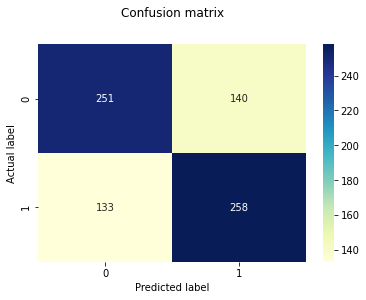

In [23]:
y_pred = dt_cv_stand.best_estimator_.predict(X_test_stand)

precision = precision_score(y_test, y_pred) 
print(precision)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


### K Nearest Neighbors

In [24]:
### K Nearest Neighbors
knn = KNeighborsClassifier() 
param_grid = {"n_neighbors": np.arange(2, 10), 
              "metric": ["minkowski","euclidian","cosine"],
              "weights": ["uniform","distance"]} 


# Standardized

knn_cv_stand = GridSearchCV(knn, param_grid, cv=kf,scoring=scoring) 
knn_cv_stand.fit(X_train_stand, y_train) 

print("\nStandardized:", knn_cv_stand.best_params_, knn_cv_stand.best_score_) 



# Normalized

knn_cv_norm = GridSearchCV(knn, param_grid, cv=kf,scoring=scoring) 
knn_cv_norm.fit(X_train_norm, y_train) 

print("\nNormalized:", knn_cv_norm.best_params_, knn_cv_norm.best_score_) 


Standardized: {'metric': 'minkowski', 'n_neighbors': 6, 'weights': 'uniform'} 0.6473318514930758

Normalized: {'metric': 'minkowski', 'n_neighbors': 6, 'weights': 'uniform'} 0.6497264990829035


Precision: 0.6756756756756757


Text(0.5, 15.0, 'Predicted label')

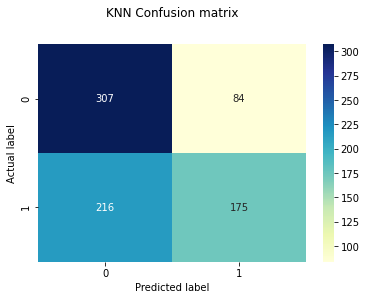

In [25]:
# Precision score on the test data

y_pred = knn_cv_norm.best_estimator_.predict(X_test_norm)

precision = precision_score(y_test, y_pred) 
print("Precision:", precision)


# Confusion matrix

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('KNN Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Logistic Regression

In [26]:
### K Nearest Neighbors
log = LogisticRegression() 
param_grid = {"penalty": ["none","l1","l2", "elasticnet"]} 


# Standardized

log_cv_stand = GridSearchCV(log, param_grid, cv=kf,scoring=scoring) 
log_cv_stand.fit(X_train_stand, y_train) 

print("\nStandardized:", log_cv_stand.best_params_, log_cv_stand.best_score_) 


# Normalized

log_cv_norm = GridSearchCV(log, param_grid, cv=kf,scoring=scoring) 
log_cv_norm.fit(X_train_norm, y_train) 

print("\nNormalized:", log_cv_norm.best_params_, log_cv_norm.best_score_) 


Standardized: {'penalty': 'none'} 0.607773021181371

Normalized: {'penalty': 'l2'} 0.6225625451313931


Precision: 0.6129032258064516


Text(0.5, 15.0, 'Predicted label')

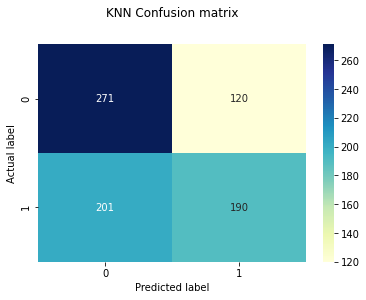

In [27]:
# Precision score on the test data

y_pred = log_cv_norm.best_estimator_.predict(X_test_norm)

precision = precision_score(y_test, y_pred) 
print("Precision:", precision)


# Confusion matrix

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('KNN Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Outcome
---
After trying out different models we found out that the **KNN** model works best to predict whether or not a venue is wheelchair accessible. We then performed some hyperparameter tuning and we managed to obtain the desired outcome. We now have a model that, using the **normalized data**, yields a precision of **0.6756** on the unseen test data. We were required to optain a model with precision over **66%**, so we can consider our task completed.


In [29]:
# Best model 
# Score: 0.6756
best_model = knn_cv_norm.best_estimator_

## Possibile future works
---
It is possible that some feature engineering on the numerical features (**Theatre_max**,**max_standing**, **U-Shaped_max**) might improve the performance our distance based model (**KNN**) as they might be affected by multicollinearity. 